In [317]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [295]:
# Checking the number of mice.
num_mice = len(data["Mouse ID"].unique())
num_mice

249

In [296]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = data[data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows["Mouse ID"].unique()

array(['g989'], dtype=object)

In [313]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [298]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filter_df = data.loc[data["Mouse ID"] != "g989"]
filter_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [299]:
# Checking the number of mice in the clean DataFrame.
len(filter_df["Mouse ID"].unique())

248

## Summary Statistics

In [300]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen = filter_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = regimen.mean()
median = regimen.median()
var = regimen.var()
std = regimen.std()
SEM = regimen.sem()

summary_df = pd.DataFrame(
    {
        "Mean Tumor Volume": mean,
        "Median Tumor Volume": median,
        "Tumor Volume Variance": var,
        "Tumor Volume Std. Dev.": std,
        "Tumor Volume Std. Err": SEM
    }
)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [301]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = filter_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

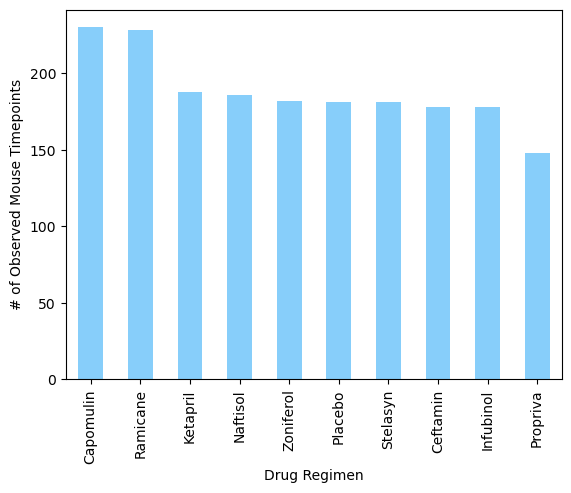

In [327]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_timepoints = filter_df.groupby("Drug Regimen")["Timepoint"].count()
total_timepoints = total_timepoints.sort_values(ascending=False)
total_timepoints.plot(kind="bar", color="lightskyblue", align="center", ylabel="# of Observed Mouse Timepoints")
plt.show()

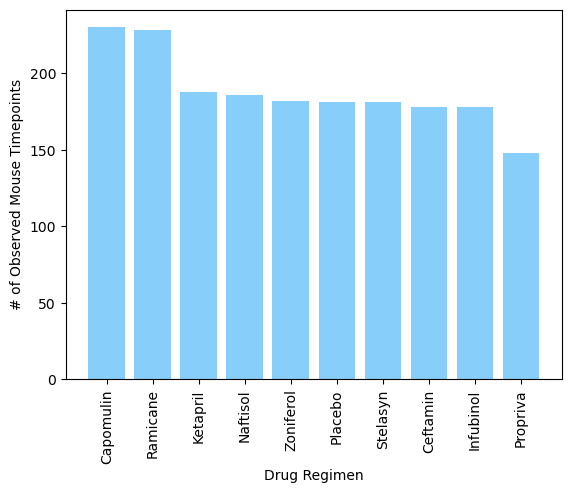

In [303]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(filter_df["Drug Regimen"].unique()))
total_timepoints = filter_df.groupby("Drug Regimen")["Timepoint"].count()
total_timepoints = pd.DataFrame(total_timepoints.sort_values(ascending=False))
plt.bar(x_axis, total_timepoints["Timepoint"], color="lightskyblue")

# Create the ticks for the bar chart's x-axis
tick_locations = [values for values in x_axis]
plt.xticks(tick_locations, total_timepoints.index, rotation="vertical")

# Label x and y axis
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the bar graph
plt.show()

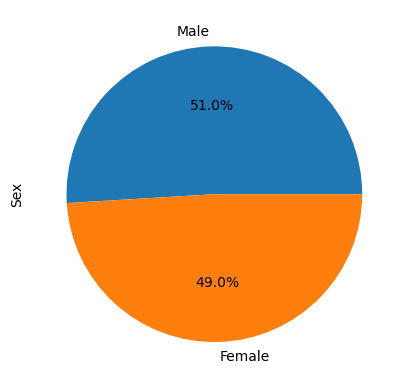

In [304]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate for the total number of each gender
gender = filter_df["Sex"].value_counts()

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
gender.plot(kind="pie", autopct="%1.1f%%", label="Sex")

# Show the pie chart 
plt.show()

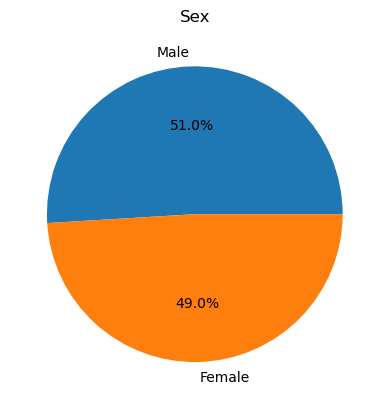

In [305]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate for the total number of each gender
gender = filter_df["Sex"].value_counts()

# The values of sections of the pie chart
labels = ["Male", "Female"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
pie = plt.pie(gender, autopct="%1.1f%%", labels=labels)

# Adding a title to the pie chart
plt.title("Sex")

# Show the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [314]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_treatments = filter_df.loc[filter_df["Drug Regimen"].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = pd.DataFrame(filter_df.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(four_treatments, greatest_timepoint, on="Mouse ID", how="inner")
merge_df = merge_df.rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y": "Final Timepoint"})

# Calculate the final tumor volume for each mouse
final_tumor_volumes = merge_df.loc[merge_df["Timepoint"] == merge_df["Final Timepoint"]]

In [315]:
# Calculate the IQR and determine potential outliers
for regimen in treatment_regimens:
    regimen_df = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == regimen]
    quartiles = regimen_df["Tumor Volume (mm3)"].quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    potential_outliers = regimen_df[(regimen_df["Tumor Volume (mm3)"] < lower_bound) | (regimen_df["Tumor Volume (mm3)"] > upper_bound)]
    print(f"{regimen}'s potential outliers:", potential_outliers["Tumor Volume (mm3)"])


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 154    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


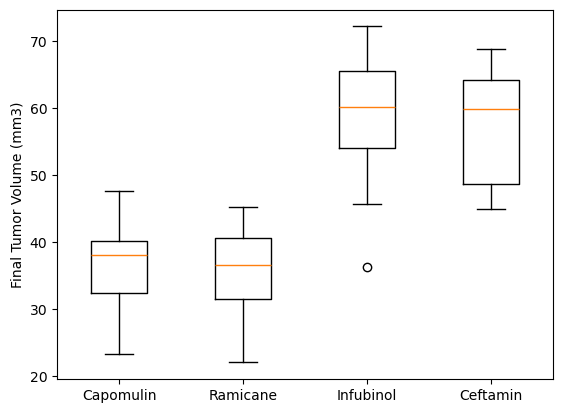

In [308]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_cap= final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
tumor_volume_ram= final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
tumor_volume_inf= final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
tumor_volume_cef= final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

plt.boxplot([tumor_volume_cap, tumor_volume_ram, tumor_volume_inf, tumor_volume_cef], labels=treatment_regimens)
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

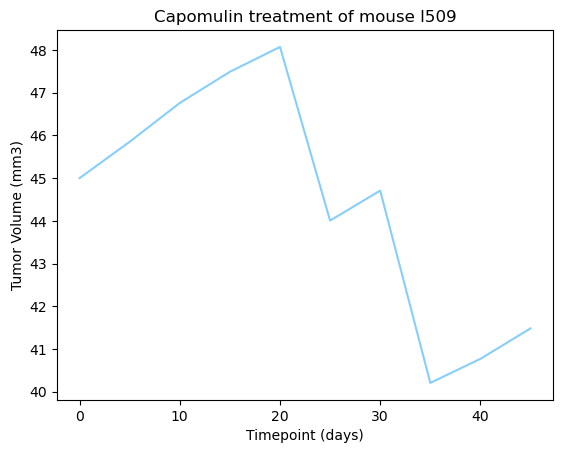

In [309]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = filter_df.loc[filter_df["Drug Regimen"] == "Capomulin"]
mouse_l509 = mouse_l509.loc[mouse_l509["Mouse ID"] == "l509"]
plot_2 = plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"], color="lightskyblue")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

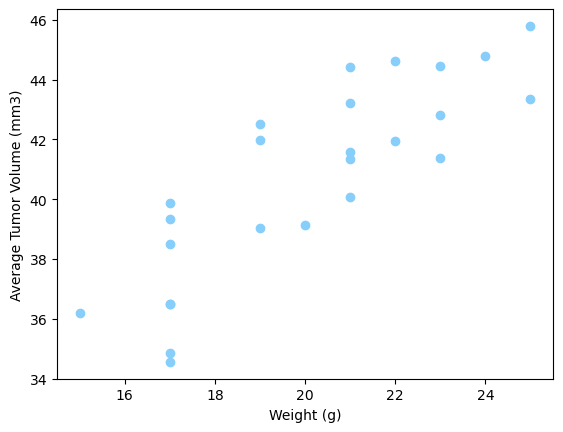

In [310]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
entire_capomulin = filter_df.loc[filter_df["Drug Regimen"] == "Capomulin"]

# Calculation of average Tumor Volume based on weight 
avg_weight = entire_capomulin.groupby(["Weight (g)", "Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_weight = pd.DataFrame(avg_weight)
avg_weight = avg_weight.reset_index()

weight = avg_weight["Weight (g)"]
avg_tumor_volume = avg_weight["Tumor Volume (mm3)"]

plt.scatter(weight, avg_tumor_volume, color="lightskyblue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


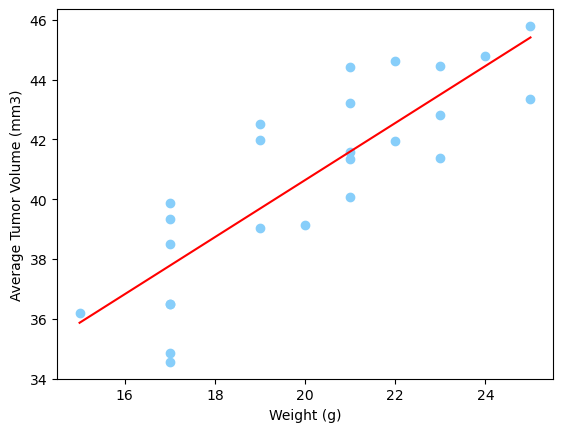

In [325]:

# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Perform a linear regression on weight versus Average Tumor Volume (mm3)
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(weight, avg_tumor_volume)

# Create equation of line to calculate predicted Average Tumor Volume (mm3)
pe_fit = pe_slope * weight + pe_int

plt.plot(weight,pe_fit,"-", color="red")
plt.scatter(weight, avg_tumor_volume, color="lightskyblue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

